
1. **SARIMA and SARIMAX Analysis**:
   - Data visualization (plotting the time series).
   - Stationarity check and making the series stationary if needed.
   - ACF and PACF plots to determine AR and MA terms.
   - SARIMA model training and prediction.
   - SARIMAX model if exogenous variables are needed.
   


2. **Facebook Prophet**:
   - Preparing the data for Prophet (renaming columns).
   - Model fitting and forecasting.
   - Visualizing the predictions.
   


3. **Recurrent Neural Networks (RNNs)**:
   - Data preprocessing for RNNs.
   - Building and training the RNN model.
   - Predictions and evaluation.
   
Let's start with the first part: SARIMA and SARIMAX analysis.



# Time Series Analysis with SARIMA, SARIMAX, Facebook Prophet, and RNNs



In this notebook, we'll walk through different methods of time series analysis and forecasting using the provided dataset.

## Table of Contents:
1. [SARIMA and SARIMAX Analysis](#SARIMA-and-SARIMAX-Analysis)
2. [Facebook Prophet Analysis](#Facebook-Prophet-Analysis)
3. [Recurrent Neural Networks (RNNs)](#Recurrent-Neural-Networks)

---



### SARIMA and SARIMAX Analysis



#### Visualizing the Data

First, let's visualize the time series data to understand its patterns and trends.


In [3]:
from capstone_functions import *
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('seaborn')
from sklearn.metrics import mean_squared_error, mean_absolute_error



Versions used in this notebook:
Python version: 3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.0.2
Numpy version: 1.23.4
Seaborn version: 0.12.2
Matplotlib version: 3.7.1
Scipy version: 1.10.1
Statsmodels version: 0.14.0
SKLearn version: 1.2.2


C:\Users\Samsickle\AppData\Local\Temp\ipykernel_22124\918562465.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:

# Load the dataset
master_df = pd.read_parquet("../Data/master_df.parquet")

# Set the random.seed(42)
np.random.seed(42)

# sns.set_style('538')
master_df.info()
master_df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2020-02-15 to 2023-03-21
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   new_confirmed                         1131 non-null   int32  
 1   new_fatal                             1131 non-null   int32  
 2   confirmed                             1131 non-null   int32  
 3   fatal                                 1131 non-null   int32  
 4   infected                              1131 non-null   int32  
 5   new_recovered                         1131 non-null   int32  
 6   recovered                             1131 non-null   int32  
 7   total_removed                         1131 non-null   int32  
 8   new_hospitalized_patients             944 non-null    float32
 9   current_hospitalized_patients         1131 non-null   float32
 10  current_intensive_care_patients       1131 non-null   float32
 11 

,new_confirmed,new_fatal,confirmed,fatal,infected,new_recovered,recovered,total_removed,new_hospitalized_patients,current_hospitalized_patients,current_intensive_care_patients,average_temperature_celsius,cancel_events,cumulative_hospitalized_patients,derived_reproduction_rate,dew_point,excess_mortality,excess_mortality_cumulative,excess_mortality_cumulative_absolute,facial_coverings,gatherings_restrictions,information_campaigns,internal_movement_restrictions,international_movement_restrictions,kap_mortality_rate,...,new_tests,new_vaccinations,people_fully_vaccinated,people_vaccinated,positive_rate,rainfall_mm,relative_humidity,rho_transmission_rate,school_closing,sig_recovery_rate,snowfall_mm,stay_home_restrictions,stringency_index,susceptible,t/k_mortality_period,t/r_infection_period,t/s_recovery_period,testing_policy,tests_per_case,total_boosters,total_tests,total_vaccinations,transport_closing,vaccination_policy,workplace_closing
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0,0,15,0,15,0,0,0,0.0,0.0,0.0,0.956790,0.0,0.0,35.466824,-6.882716,-2.363827,-3.049970,-12854.276367,0.0,0.0,0.0,0.0,3.0,0.000149,...,139.5,0.0,0.0,0.0,0.107,0.000000,55.902618,0.008729,0.0,0.000097,0.0,0.0,8.33,326687488.0,279.384735,4.773121,429.58667,1.0,9.3,0.0,139.5,0.0,0.0,0.0,0.0
2020-02-16,0,0,15,0,15,0,0,0,0.0,0.0,0.0,3.919753,0.0,0.0,34.655106,-5.919753,-2.360000,-3.030000,-13024.399414,0.0,0.0,0.0,0.0,3.0,0.000155,...,139.5,0.0,0.0,0.0,0.107,0.000000,49.045643,0.008742,0.0,0.000097,0.0,0.0,8.33,326687488.0,268.378815,4.766480,429.58667,1.0,9.3,0.0,279.0,0.0,0.0,0.0,0.0
2020-02-17,10,0,25,0,25,0,0,0,0.0,0.0,0.0,6.197531,0.0,0.0,33.889042,-0.481481,-2.294236,-3.005807,-13172.550781,0.0,0.0,0.0,0.0,3.0,0.000161,...,232.5,0.0,0.0,0.0,0.107,0.056444,62.382675,0.008749,0.0,0.000097,0.0,0.0,8.33,326687488.0,258.510406,4.762334,429.58667,1.0,9.3,0.0,511.5,0.0,0.0,0.0,0.0
2020-02-18,0,0,25,0,25,0,0,0,0.0,0.0,0.0,0.592593,0.0,0.0,33.163906,-5.759259,-2.166535,-2.977392,-13298.730469,0.0,0.0,0.0,0.0,3.0,0.000167,...,232.5,0.0,0.0,0.0,0.107,0.000000,62.698406,0.008752,0.0,0.000097,0.0,0.0,8.33,326687488.0,249.624802,4.760667,429.58667,1.0,9.3,0.0,744.0,0.0,0.0,0.0,0.0
2020-02-19,0,0,25,0,25,0,0,0,0.0,0.0,0.0,-2.753086,0.0,0.0,32.475555,-7.364198,-1.976897,-2.944754,-13402.938477,0.0,0.0,0.0,0.0,3.0,0.000172,...,232.5,0.0,0.0,0.0,0.107,0.000000,71.309845,0.008751,0.0,0.000097,0.0,0.0,8.33,326687488.0,241.594635,4.761477,429.58667,1.0,9.3,0.0,976.5,0.0,0.0,0.0,0.0


In [5]:
cutoff=60

cutoff_date = master_df.index.max() - pd.Timedelta(days=cutoff)

train_df = master_df[master_df.index < cutoff_date].copy()
test_df = master_df[master_df.index >= cutoff_date].copy()


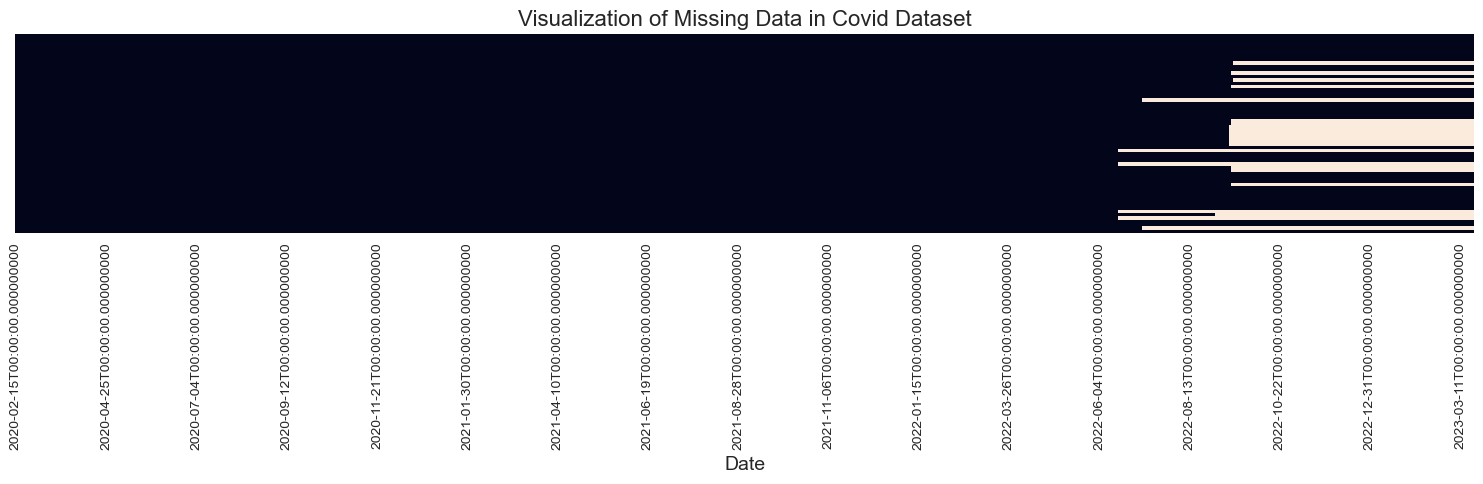

In [6]:
# master_df.index = pd.to_datetime(master_df.index).date
# import matplotlib.dates as mdates

# Your existing code
plt.figure(figsize=(15,5))
sns.heatmap(master_df.isna().T, yticklabels=[], cbar=False)

# Setting x-axis to show every 3 months and starting from 2020-02-15
ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticks(xticks[::5])

plt.title("Visualization of Missing Data in Covid Dataset", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
# Creating subplots vertically aligned
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("Daily Confirmed Cases", "Currently Infected", "Total Confirmed"))

# Adding traces for the train dataset
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['new_confirmed'], name='New Confirmed (Train)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['infected'], name='Currently Infected (Train)', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['confirmed'], name='Total Confirmed (Train)', line=dict(color='blue')), row=3, col=1)

# Adding traces for the test dataset
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['new_confirmed'], name='New Confirmed (Test)', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['infected'], name='Currently Infected (Test)', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['confirmed'], name='Total Confirmed (Test)', line=dict(color='red')), row=3, col=1)

# Update the layout
fig.update_layout(height=800, 
                width=1000, 
                title='Daily Confirmed Cases, Currently Infected, and Total Confirmed',
                xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='New Confirmed Cases', row=1, col=1)
fig.update_yaxes(title_text='Currently Infected', row=2, col=1)
fig.update_yaxes(title_text='Total Confirmed', row=3, col=1)



### Checking Stationarity
Before applying ARIMA or its variants, it's essential to ensure our time series is stationary.


In [8]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    return dfoutput


In [9]:

test_stationarity(master_df['confirmed'])



Results of Dickey-Fuller Test:


Test Statistic                   -0.159874
p-value                           0.943139
#Lags Used                       22.000000
Number of Observations Used    1108.000000
Critical Value (1%)              -3.436266
Critical Value (5%)              -2.864152
Critical Value (10%)             -2.568161
dtype: float64


If the `p-value` is less than 0.05, the series is stationary. Otherwise, you might need to take differences or transformations to make it stationary.


In [10]:
# List to collect the 'Test Statistic' values for each differencing level
test_statistics = []

# Iterate over possible differencing levels from 1 to 19
for i in range(1, 20):
    # Difference the 'confirmed' series by the current level and drop NA values
    differenced_series = master_df['confirmed'].diff(i).dropna()
    
    # Get the test statistic from the stationarity check and append to the list
    test_stat = check_stationarity(differenced_series).loc['Test Statistic']
    test_statistics.append(test_stat)

# Display the collected test statistics for each differencing level
for i, test_stat in enumerate(test_statistics, 1):
    print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Differencing Level 1: Test Statistic = -4.78
Differencing Level 2: Test Statistic = -4.42
Differencing Level 3: Test Statistic = -4.37
Differencing Level 4: Test Statistic = -3.59
Differencing Level 5: Test Statistic = -3.84
Differencing Level 6: Test Statistic = -3.52
Differencing Level 7: Test Statistic = -3.46
Differencing Level 8: Test Statistic = -3.11
Differencing Level 9: Test Statistic = -2.92
Differencing Level 10: Test Statistic = -3.15
Differencing Level 11: Test Statistic = -2.95
Differencing Level 12: Test Statistic = -3.32
Differencing Level 13: Test Statistic = -3.93
Differencing Level 14: Test Statistic = -4.10
Differencing Level 15: Test Statistic = -4.43
Differencing Level 16: Test Statistic = -3.49
Differencing Level 17: Test Statistic = -3.55
Differencing Level 18: Test Statistic = -3.58
Differencing Level 19: Test Statistic = -3.64


In [11]:
test_stationarity(master_df['new_confirmed'])


Results of Dickey-Fuller Test:


Test Statistic                   -4.783973
p-value                           0.000058
#Lags Used                       21.000000
Number of Observations Used    1109.000000
Critical Value (1%)              -3.436260
Critical Value (5%)              -2.864150
Critical Value (10%)             -2.568159
dtype: float64

### Seasonality

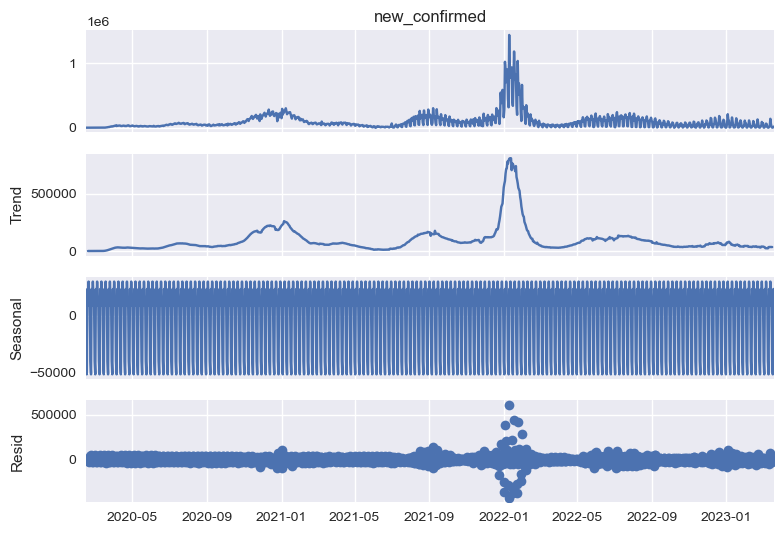

In [12]:
# Performing seasonal decomposition on 'new_confirmed' column
tsa.seasonal_decompose(master_df['new_confirmed'], model='additive', period=7).plot();


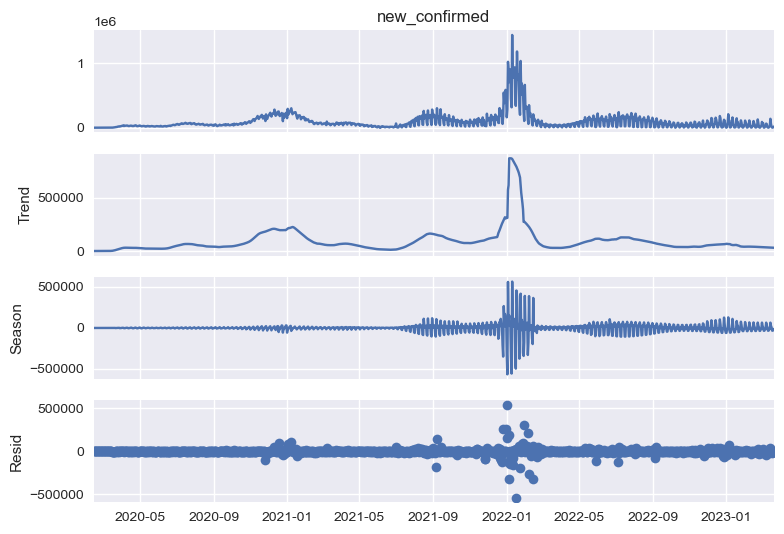

In [13]:

from statsmodels.tsa.seasonal import STL
stl = STL(master_df['new_confirmed'], seasonal=7, period=7, robust=True, seasonal_deg=0)
result = stl.fit()

master_df['trend'] = result.trend
master_df['seasonal'] = result.seasonal
master_df['resid'] = result.resid

result.plot();

This is a little difficult for me to understand, except to say that there really doesn't appear to be much of a seasonal component.

In [14]:
X, y = create_features(master_df, label='new_confirmed')
features_and_target = pd.concat([X, y], axis=1)

features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,new_confirmed
date,,,,,,,,,,,
2020-02-15,0,5,1,2,2020,46,15,7,Saturday,Winter,0
2020-02-16,0,6,1,2,2020,47,16,7,Sunday,Winter,0
2020-02-17,0,0,1,2,2020,48,17,8,Monday,Winter,10
2020-02-18,0,1,1,2,2020,49,18,8,Tuesday,Winter,0
2020-02-19,0,2,1,2,2020,50,19,8,Wednesday,Winter,0


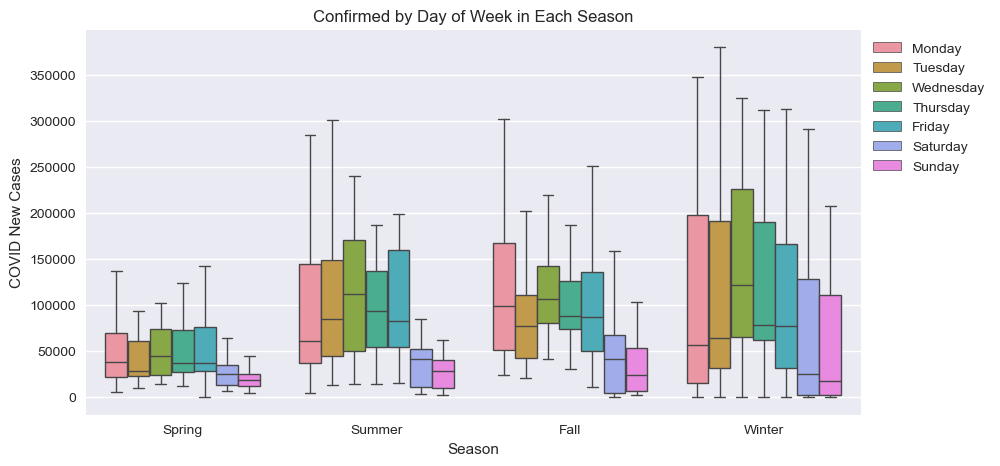

In [15]:


fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='season',
            y='new_confirmed',
            hue='weekday',
            ax=ax,
            linewidth=1,
            showfliers=False)
ax.set_title('Confirmed by Day of Week in Each Season')
ax.set_xlabel('Season')
ax.set_ylabel('COVID New Cases')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

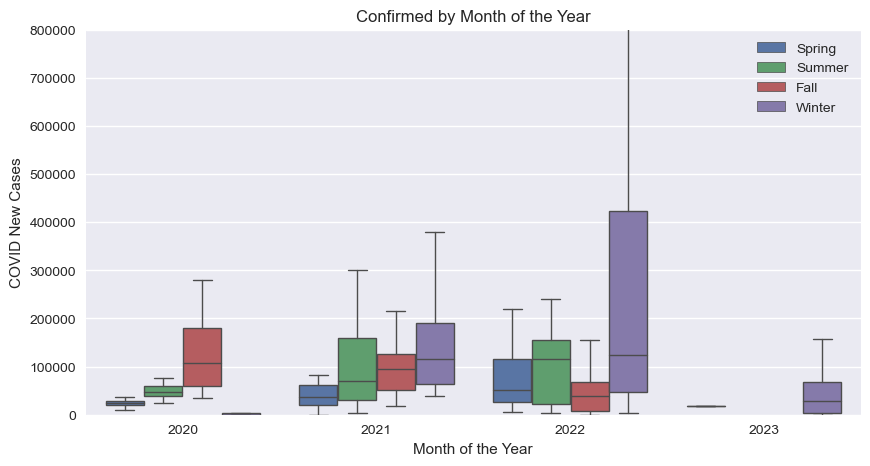

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='year',
            y='new_confirmed',
            hue='season',
            ax=ax,
            linewidth=1,
            showfliers=False)
ax.set_title('Confirmed by Month of the Year')
ax.set_xlabel('Month of the Year')
ax.set_ylabel('COVID New Cases')
ax.set_ylim(0, 800000)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


### ACF and PACF plots
To determine the order of the AR and MA terms, we can plot the autocorrelation and partial autocorrelation charts.


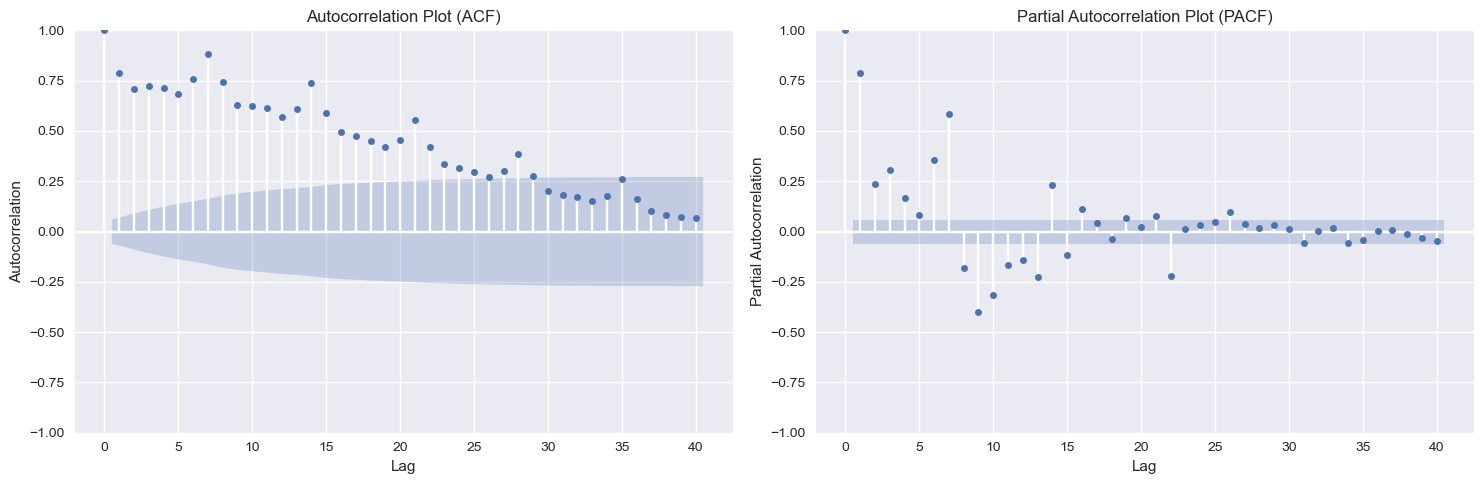

In [17]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


From the PACF it looks like our auto regressive model would only benefit by a maximum of 15-16 days. We will use this as our base p value.  
From our ACF graph it looks like our moving average model would only benefit by a maximum of 25-28 days. We will use this as our base q value.  

In [18]:
def plot_cross_val(n_splits: int,
                splitter_func,
                df: pd.DataFrame,
                title_text: str) -> None:

    """Function to plot the cross validation of various
    sklearn splitter objects."""

    split = 1
    plot_data = []

    for train_index, valid_index in splitter_func(n_splits=n_splits).split(df):
        plot_data.append([train_index, 'Train', f'{split}'])
        plot_data.append([valid_index, 'Test', f'{split}'])
        split += 1

    plot_df = pd.DataFrame(plot_data,
                        columns=['Index', 'Dataset', 'Split'])\
                        .explode('Index')

    fig = go.Figure()
    for _, group in plot_df.groupby('Split'):
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Train'],
                                y=group['Split'].loc[group['Dataset'] == 'Train'],
                                name='Train',
                                line=dict(color="blue", width=10)
                                ))
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Test'],
                                y=group['Split'].loc[group['Dataset'] == 'Test'],
                                name='Test',
                                line=dict(color="goldenrod", width=10)
                                ))

    fig.update_layout(template="simple_white", 
                    font=dict(size=20),
                    title_text=title_text, 
                    title_x=0.5, width=850,
                    height=450, 
                    xaxis_title='Index', 
                    yaxis_title='Split')

    legend_names = set()
    fig.for_each_trace(
        lambda trace:
        trace.update(showlegend=False)
        if (trace.name in legend_names) else legend_names.add(trace.name))
    fig.show()
    
    return plot_df

# Import packages

# Plot the time series cross validation splits
plot = plot_cross_val(n_splits=5,
            splitter_func=TimeSeriesSplit,
            df=train_df,
            title_text='Time Series Cross-Validation')


In [19]:
previous = train_df['new_confirmed']
actual = test_df['new_confirmed']

lll

NameError: name 'lll' is not defined

In [ ]:
tscv = TimeSeriesSplit(n_splits = 5)
# arima_results = pd.DataFrame(columns = ['p', 'd', 'q', 'AIC'])


cross_vali_results = pd.DataFrame(columns = ['AIC', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

for train_index, test_index in tscv.split(train_df):
    cv_train, cv_test = train_df.iloc[train_index], train_df.iloc[test_index]
    
    arima = SARIMAX(cv_train['confirmed'], order=(4,1,19), freq='D').fit(disp=False)
    
    predicted1 = arima.predict(n_periods= len(actual), X=test_df.index)

    arima_result2 = evaluate_arima_forecast(previous, actual, predicted1).set_index('Metric')



c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Absolute Error (MAE): 26042.41
Root Mean Squared Error (RMSE): 31251.30
Mean Absolute Percentage Error (MAPE): 488.81%
Adjusted Mean Absolute Percentage Error (sMAPE): 43.59%


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Absolute Error (MAE): 26042.41
Root Mean Squared Error (RMSE): 31251.30
Mean Absolute Percentage Error (MAPE): 488.81%
Adjusted Mean Absolute Percentage Error (sMAPE): 43.59%


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Absolute Error (MAE): 26042.41
Root Mean Squared Error (RMSE): 31251.30
Mean Absolute Percentage Error (MAPE): 488.81%
Adjusted Mean Absolute Percentage Error (sMAPE): 43.59%


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Absolute Error (MAE): 26042.41
Root Mean Squared Error (RMSE): 31251.30
Mean Absolute Percentage Error (MAPE): 488.81%
Adjusted Mean Absolute Percentage Error (sMAPE): 43.59%


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [ ]:

predicted1 = model1.predict(n_periods= len(actual), X=test_df.index)

arima_result2 = evaluate_arima_forecast(previous, actual, predicted1).set_index('Metric')

In [23]:
import pmdarima as pm
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.metrics import smape
from pmdarima.model_selection import cross_val_score, RollingForecastCV

# Define the pipeline
estimators = [
    ("boxcox", BoxCoxEndogTransformer()),
    ("model", pm.AutoARIMA(seasonal=True, suppress_warnings=True))
]
pipeline = Pipeline(estimators)

# Assume y is your time series data
y = train_df['confirmed']

rolling_for_val = RollingForecastCV(h=60, step =1)
# Use cross_val_score to evaluate the model using the sMAPE metric
scores = cross_val_score(pipeline, y, scoring='smape', cv=rolling_for_val)  # 5-fold cross validation

# Print the scores
print(f"sMAPE scores for each fold: {scores}")
print(f"Mean sMAPE score: {scores.mean()}")


C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning:

Error fitting  ARIMA(4,2,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\m

sMAPE scores for each fold: [ 5.88738     6.52137532  4.56417493  2.58096132  2.80103048  3.30280011
  3.34043444  4.36007856  4.16150411  2.80813003  0.69146989  0.50305599
  0.24847935  0.83206268  1.10719789  1.71811569  1.15017785  0.29069041
  0.22541965  0.95801461  1.42896608  1.83307567  1.99247373  0.68369623
  0.65405315  0.41002291  0.23171632  0.56380291  0.81454603  0.71181249
  0.14649424  1.71286722  2.60157563  0.4546563   0.18804675  0.30081225
  0.54818394  0.64781202  1.93966456  0.58031422  0.44834767  0.29314002
  0.29079553  0.3217658   0.43554458  2.15710795  0.86675932  0.50309526
  1.684521    1.30690061  1.60609366  0.70308523  0.93392475  0.94958237
  0.86918284  1.15087591  2.06635986  1.62829496  1.20317005  1.08340881
  1.65932476  1.36225123  1.99429142  2.88205376  3.22614408  2.02602733
  0.81663488  2.11614922  3.072211    3.16850819  3.10053213  3.55224041
  1.83421122  0.76575846  2.57191436  2.47538093  2.52397539  2.94611176
  2.93482904  1.9564552

In [ ]:
# # Capture the current time to measure the time taken by the grid search
# start_time = time.time()

# # Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
# grid = GridSearchCV(pipe, param_grid, return_train_score=True, 
#                     cv=3, refit=True, verbose=1, n_jobs=-1, scoring=scoring_metric)


# tss = TimeSeriesSplit(n_splits=5)

# grid_search = GridSearchCV(pipe, grid, cv=tss, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X, y)

# best_model = grid_search.best_estimator_
# best_rmse = np.sqrt(-grid_search.best_score_)


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit

# tss = TimeSeriesSplit(n_splits=5)
# df = train_df.sort_index()

In [ ]:
# tss = TimeSeriesSplit(n_splits=5)
# df = df.sort_index()



# fold = 0
# preds = []
# scores = []
# for train_idx, val_idx in tss.split(df):
#         train = df.iloc[train_idx]
#         test = df.iloc[val_idx]

#         train = create_features(train)
#         test = create_features(test)

#         FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
#                         'lag1','lag2','lag3']
#         TARGET = 'PJME_MW'

#         X_train = train[FEATURES]
#         y_train = train[TARGET]

#         X_test = test[FEATURES]
#         y_test = test[TARGET]

#         reg = CatBoostRegressor()
#         reg.fit(X_train, y_train,
#                 eval_set=[(X_train, y_train), (X_test, y_test)],
#                 verbose=100)

#         y_pred = reg.predict(X_test)
#         preds.append(y_pred)
#         score = np.sqrt(mean_squared_error(y_test, y_pred))
#         scores.append(score)

# print(f'Score across folds {np.mean(scores):0.4f}')
# print(f'Fold scores:{scores}')


#### SARIMA Model Training and Prediction

Once we have our terms, we can train our SARIMA model.


In [ ]:

previous = train_df['new_confirmed'].loc['2023-01-01':]
actual = test_df['new_confirmed']

In [ ]:

# from statsmodels.tsa.arima.model import ARIMA

# # Fit the ARIMA model
# base_model = ARIMA(train_df['confirmed'], order=(16, 1, 25), freq='D')
# arima = base_model.fit()


In [ ]:

# arima.summary()


In [ ]:
# predicted = arima_result.predict(n_periods= len(actual), X=test_df.index)

# arima_result1 = evaluate_arima_forecast(previous, actual, predicted).set_index('Metric')

In [ ]:
model1 = pm.auto_arima(train_df['new_confirmed'], 
                       seasonal=False,
                       stationary=True)


In [ ]:
model1.summary()


In [ ]:

predicted1 = model1.predict(n_periods= len(actual), X=test_df.index)

arima_result2 = evaluate_arima_forecast(previous, actual, predicted1).set_index('Metric')

In [ ]:

# model2 = pm.auto_arima(train_df['new_confirmed'], 
#                         start_p=16, max_p=20, 
#                         start_q=25, max_q=30, # maximum p and q
#                         test='adf',       # use adftest to find optimal 'd'
#                         d=None,           # let model determine 'd'
#                         m=1,              # frequency of series
#                         seasonal=False,   # No Seasonality
#                         stepwise=True, 
#                         )


In [ ]:
# model2.summary()


In [ ]:
# predicted2 = model2.predict(n_periods= len(actual), X=test_df.index)


# res2 = evaluate_arima_forecast(previous, actual, predicted2).set_index('Metric')

Quick Review of ARIMA Modeling

In [ ]:
# pd.concat([res1, res2], axis=1, join='inner', keys=['res1', 'res2'])

## Sarima

In [ ]:
model4 = pm.auto_arima(train_df['new_confirmed'], 
                    seasonal=True,
                    trace=True,
                    scoring='mse'
                    )


In [ ]:
model4.summary()

In [ ]:
predicted4 = model4.predict(n_periods= len(actual), X=test_df.index)

res4 = evaluate_arima_forecast(previous, actual, predicted4).set_index('Metric')


#### SARIMAX Model (if using exogenous variables)

If we want to use external predictors, SARIMAX is the way to go.


In [ ]:


exog_variables = master_df[['exog1', 'exog2']]
model = SARIMAX(master_df['new_confirmed'], exog=exog_variables, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()
predictions = results.predict(start=start_date, end=end_date, exog=new_exog_data)



# Simple Prophet Model
- Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
    - Datetime column named: `ds`
    - target : `y`

In [ ]:
display(train_df.head())
test_df.head()

In [ ]:
# Format data for prophet model using ds and y
master_df_train_prophet = train_df.reset_index() \
    .rename(columns={'date':'ds',
                    'new_confirmed':'y'})
    


In [ ]:
%%time
model = Prophet(yearly_seasonality=True)
model.fit(master_df_train_prophet)

In [ ]:
# Predict on test set with model
master_df_test_prophet = test_df.reset_index() \
    .rename(columns={'date':'ds',
                    'new_confirmed':'y'})

forecast = model.predict(master_df_test_prophet)

In [ ]:
from prophet.plot import plot_plotly

fig = plot_plotly(model, forecast) # returns a plotly Figure object
fig.show()

In [ ]:
fig = model.plot_components(master_df_test_fcst)
plt.show()


### Facebook Prophet Analysis

Facebook Prophet is designed for forecasting time series data. Let's see how we can use it.



#### Preparing Data for Prophet

Prophet requires the dataset to have two columns: `ds` and `y`, where `ds` is the timestamp and `y` is the value we want to predict.


In [ ]:


from fbprophet import Prophet

# Preparing data
prophet_df = master_df.reset_index()[['date', 'new_confirmed']]
prophet_df.columns = ['ds', 'y']

# Create and fit model
model = Prophet()
model.fit(prophet_df)

# Predictions
future = model.make_future_dataframe(periods=number_of_days_to_predict)
forecast = model.predict(future)
model.plot(forecast)




### Recurrent Neural Networks (RNNs)

RNNs are suitable for time series prediction due to their ability to recognize patterns in sequences of data.



#### Data Preprocessing for RNNs


In [ ]:


from sklearn.preprocessing import MinMaxScaler

data = master_df['new_confirmed'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for training
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])




#### Building and Training the RNN


In [ ]:


from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)




#### Predictions and Evaluation


In [ ]:


scaled_predictions = model.predict(X_test)
predictions = scaler.inverse_transform(scaled_predictions)




---

This outline gives a clear walkthrough of the different steps involved in each method. Depending on the specific details of your dataset and the problem at hand, you might need to adjust and fine-tune some of these steps.

In [ ]:
# # estimators = [('scaler', None),
# #             ('feature_selection', None),
# #             ('dim_reducer', None),
# #             ('model', ARIMA())]

# # pipe = Pipeline(estimators) #, memory=cachedir

# # param_grid = {
# #     'model__p': list(range(16)),
# #     'model__d': list(range(3)),
# #     'model__q': list(range(16))
# # }

# # # 4. Split the dataset using TimeSeriesSplit
# # tscv = TimeSeriesSplit(n_splits=5)

# # # 5. Set up and run the GridSearchCV
# # gsearch = GridSearchCV(estimator=pipe, cv=tscv, param_grid=param_grid, verbose=1, n_jobs=-1)
# # gsearch.fit(train_df.index.values.reshape(-1, 1), train_df['new_confirmed'])

# # print(gsearch.best_params_)


# # best_score, best_cfg = float("inf"), None

# # GridSearchCV
# # for train_index, validation_index in tscv.split(train_df['new_confirmed']):
# #     train, test = train_df['new_confirmed'].iloc[train_index], train_df['new_confirmed'].iloc[validation_index]

# #     try:
# #         model = pm.auto_arima(train, start_p=1, start_q=1,
# #                         test='adf',       # use adftest to find optimal 'd'
# #                         max_p=15, max_q=3, # maximum p and q
# #                         m=1,              # frequency of series
# #                         d=None,           # let model determine 'd'
# #                         seasonal=False,   # No Seasonality
# #                         start_P=0, 
# #                         D=0, 
# #                         trace=True,
# #                         error_action='ignore',  
# #                         suppress_warnings=True, 
# #                         stepwise=True, 
# #                         stationary=True,
# #                         n_jobs=-1)
# #     except:
# #         continue
# #     predictions = model.predict(n_periods=len(test))
# #     mse = mean_squared_error(test, predictions)
    
# #     if mse < best_score:
# #         best_score, best_cfg = mse, (model.order, model.seasonal_order)
# #         best_model = model

# # print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
# # best_model.summary()

# # gsearch = GridSearchCV(estimator=model, cv=tscv,
# #                         param_grid=param_search)
# # gsearch.fit(X, y)


# tscv = TimeSeriesSplit(n_splits=5)

# for train_index, validation_index in tscv.split(series['Confirmed']):


# model = pm.auto_arima(y= test_df['new_confirmed'], start_p=1, start_q=1,
#                     ['new_confirmed'], start_p=1, start_q=1,
#                     test='adf',       # use adftest to find optimal 'd'
#                     max_p=20, max_q=5, # maximum p and q
#                     m=1,              # frequency of series
#                     d=None,           # let model determine 'd'
#                     seasonal=False,   # No Seasonality
#                     start_P=0, 
#                     D=0, 
#                     trace=True,
#                     error_action='ignore',  
#                     suppress_warnings=True, 
#                     stepwise=True)

# print(model.summary())

# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# import numpy as np
# X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
# y = np.array([1, 6, 7, 1, 2, 3])

# model = ARIMA()
# param_search = {'max_depth' : [3, 5]}

# tscv = TimeSeriesSplit(n_splits=2)
# gsearch = GridSearchCV(estimator=model, cv=tscv,
#                         param_grid=param_search)
# gsearch.fit(X, y)

In [ ]:
# from statsmodels.tsa.x13 import x13_arima_analysis
# result = x13_arima_analysis(df['your_column_name'])
# print(result.seasadj)  # Seasonally adjusted series

# # Performing seasonal decomposition on 'new_confirmed' column
# decomposition = tsa.seasonal_decompose(master_df['current_hospitalized_patients'], model='additive', period=7)

# # Adding the decomposition data to the dataframe
# master_df["Hosp_Trend"] = decomposition.trend
# master_df["Hosp_Seasonal"] = decomposition.seasonal
# master_df["Hosp_Residual"] = decomposition.resid


# # Creating subplots for the trend, seasonal, and residual components
# cols = ["Hosp_Trend", "Hosp_Seasonal", "Hosp_Residual"]
# fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

# for i, col in enumerate(cols):
#     fig.add_trace(go.Scatter(x=master_df.index, y=master_df[col], name=col), row=i+1, col=1)

# fig.update_layout(height=800, width=1200, title='Seasonal Decomposition of Hospitalized Patients')
# fig.show()

# # Performing seasonal decomposition on 'new_confirmed' column
# decomposition = tsa.seasonal_decompose(master_df['new_fatal'], model='additive', period=12)

# # Adding the decomposition data to the dataframe
# master_df["Fatal_Trend"] = decomposition.trend
# master_df["Fatal_Seasonal"] = decomposition.seasonal
# master_df["Fatal_Residual"] = decomposition.resid


# # Creating subplots for the trend, seasonal, and residual components
# cols = ["Fatal_Trend", "Fatal_Seasonal", "Fatal_Residual"]
# fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

# for i, col in enumerate(cols):
#     fig.add_trace(go.Scatter(x=master_df.index, y=master_df[col], name=col), row=i+1, col=1)

# fig.update_layout(height=800, width=1200, title='Seasonal Decomposition of Daily Fatalities')
# fig.show()
